In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ica_benchmark.sample.ica import sample_ica_data, sample_iva_data
from ica_benchmark.processing import whitening_multivar_matrix, whitening_multivar
%matplotlib inline

K = 10
M = 3
N = 10_000

X = list()
S = list()
A = list()
W_opt = list()

def sample_iva_data(K, M, N, seed=42):
    # K number of datasets
    # M number of SVC (electrodes)
    # N number of samples
    # Sample data as in Anderson 2012 (Joint Blind Source Separation With Multivariate Gaussian Model: Algorithms and Performance Analysis)
    np.random.seed(seed)

    X, S, A = list(), list(), list()
    SCVs = list()
    for m in range (M):
        cov = np.random.normal(size=(K, K))
        cov = cov @ cov.T
        SCV = np.random.multivariate_normal(np.zeros(K), cov, size=N).T
        SCVs.append(SCV)
    S = np.stack(SCVs).transpose(1, 0, 2)
    assert S.shape == (K, M, N)        
        
    A = np.random.normal(0, 1, size=(K, M, M))
    X = np.stack([a @ s for a, s in zip(A, S)])
    assert np.all((A[0] @ S[0]) == X[0])
    return X, S, A

X, S, A = sample_iva_data(K, M, N)
W_opt = np.stack([np.linalg.inv(w) for w in A])
Z = np.stack([whitening_multivar(x) for x in X])


In [2]:
from sklearn.decomposition import FastICA
ica = FastICA()
for k in range(K):
    y = ica.fit_transform(X[k].T)
#     y = X[k].T
    print(k, np.log10(ISI(ica._unmixing.reshape(1, M, M), A[k].reshape(1, M, M))))
    fig, axes = plt.subplots(1, 2)
    
    axes[0].imshow(y.T @ y)
    axes[1].imshow(ica._unmixing @ A[k])
    plt.show()


/home/paulo/anaconda3/envs/bci_update/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


NameError: name 'ISI' is not defined

In [82]:
np.log10(ISI(ica._unmixing.reshape(1, M, M), A[k].reshape(1, M, M)))

(10000, 3)

In [89]:
ca._unmixing @ A[0]

NameError: name 'ca' is not defined

In [69]:
ica._unmixing @ A[0]

array([[ 0.04671804, -1.04107251,  0.29306055],
       [-0.2522434 , -0.43365986,  0.17474998],
       [ 2.66155323, -0.66294003,  0.20364959]])

Text(0.5, 1.0, 'SCV 0')

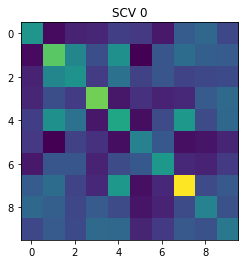

In [26]:
scv_0 = S[:, 0]
plt.imshow(scv_0 @ scv_0.T / N)
plt.title("SCV 0")

In [27]:
(
    ISI(
        np.stack(
            [
                whitening_multivar_matrix(X[i])
#                 np.linalg.inv(A[i])
                for i in range(K)
            ]
        ),
        A
    ),
    ISI(
        W_opt,
        A
    )
)

(0.7087317701211356, 5.921189464667501e-16)

In [28]:
whitening_multivar_matrix(X[0]), A[0]

(array([[ 8.46955038, -2.24671738, -2.20222805],
        [-2.24671738,  0.77548199,  0.52921568],
        [-2.20222805,  0.52921568,  0.83773766]]),
 array([[ 0.84276742, -0.39035341,  0.07189153],
        [ 2.4382565 , -0.20884629,  0.07435694],
        [ 0.70308126, -1.23101169,  0.38366372]]))

Text(0.5, 1.0, 'Est SCV from Z 0')

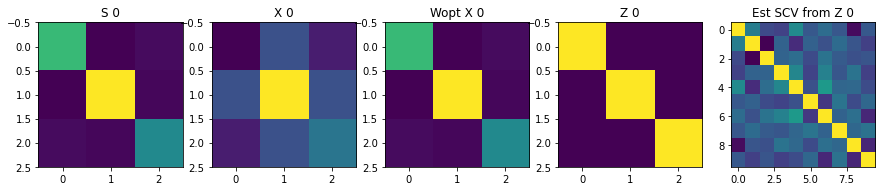

In [29]:
s_0 = S[0]
x_0 = X[0]
z_0 = Z[0]

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 4))
ax1.imshow(s_0 @ s_0.T / N)
ax1.set_title("S 0")
ax2.imshow(x_0 @ x_0.T / N)
ax2.set_title("X 0")
ax3.imshow(
    (W_opt[0] @ x_0) @ (W_opt[0] @ x_0).T / N
)
ax3.set_title("Wopt X 0")
ax4.imshow(
    (whitening_multivar_matrix(x_0) @ x_0) @ (whitening_multivar_matrix(x_0) @ x_0).T / N
)
ax4.set_title("Z 0")
ax5.imshow(Z[:, 0] @ Z[:, 0].T / N)
ax5.set_title("Est SCV from Z 0")



In [30]:
(A[0] @ S[0]) == X[0]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

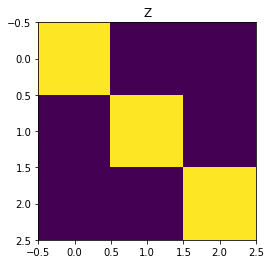

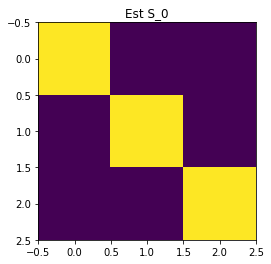

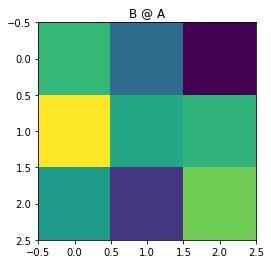

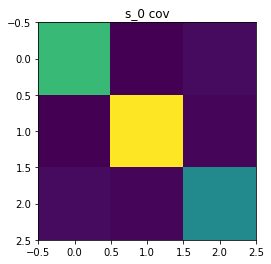

In [31]:
x_0 = X[0]
B = whitening_multivar_matrix(x_0)

c = B @ x_0
plt.imshow(c @ c.T)
plt.title("Z")
plt.show()

s_0 = S[0]
c = B @ A[0] @ s_0
plt.imshow(c @ c.T)
plt.title("Est S_0")
plt.show()

plt.imshow(B @ A[0])
plt.title("B @ A")
plt.show()


plt.imshow(s_0 @ s_0.T)
plt.title("s_0 cov")
plt.show()

0.7087317701211356

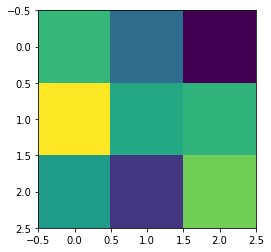

In [32]:
B = np.stack(
    [
        whitening_multivar_matrix(x)
        for x in X
    ]
)
plt.imshow(B[0] @ A[0])
ISI(B, A)

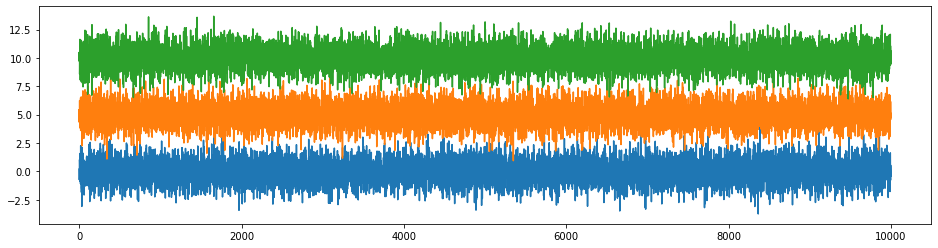

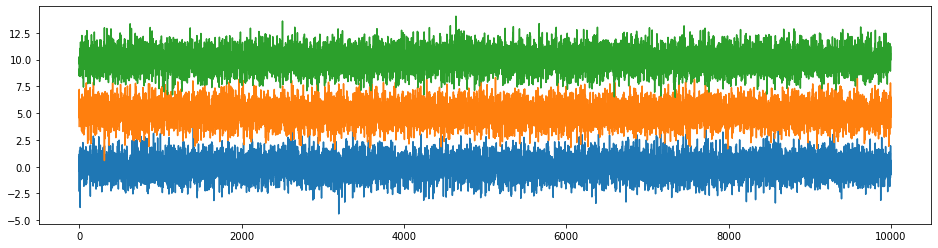

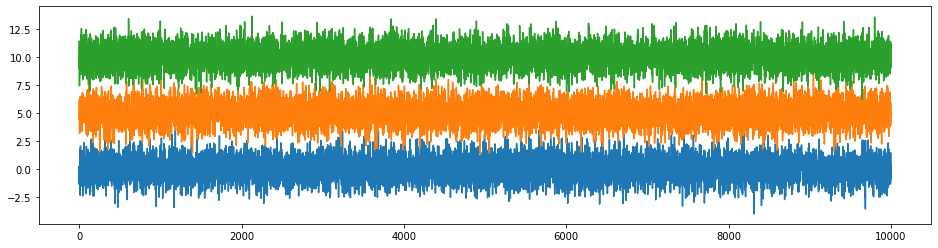

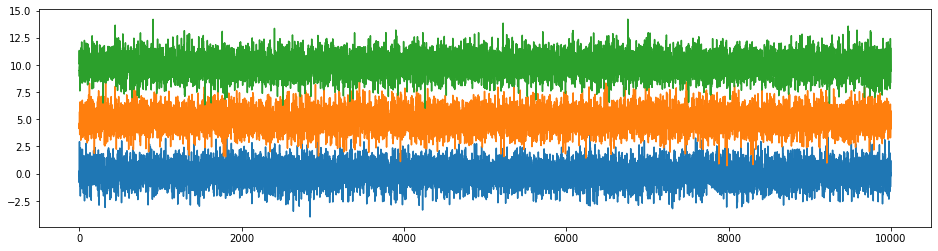

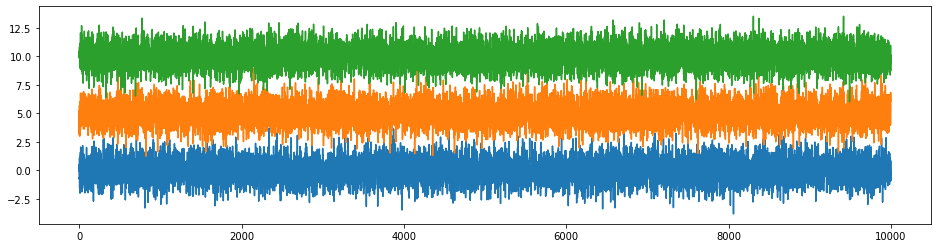

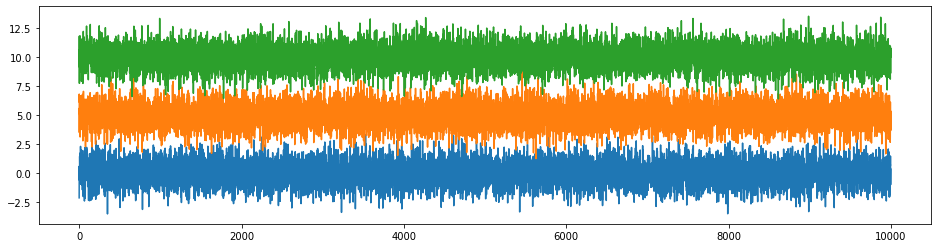

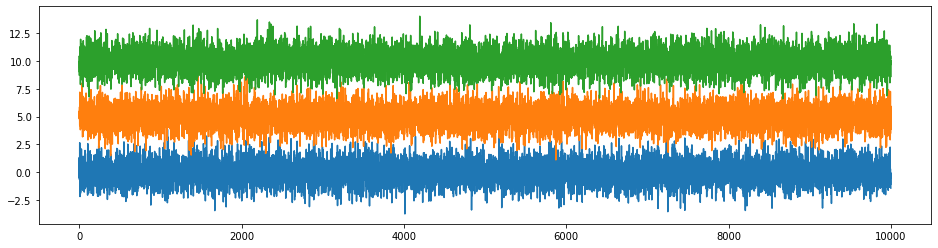

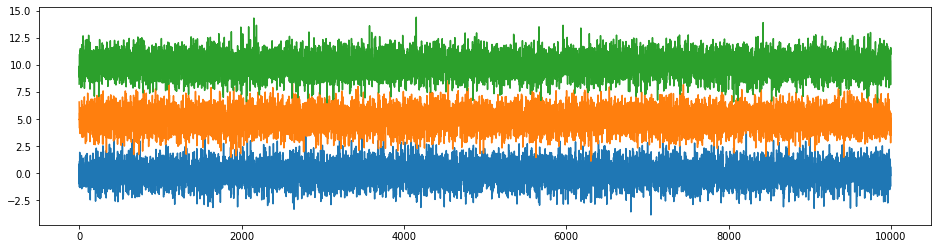

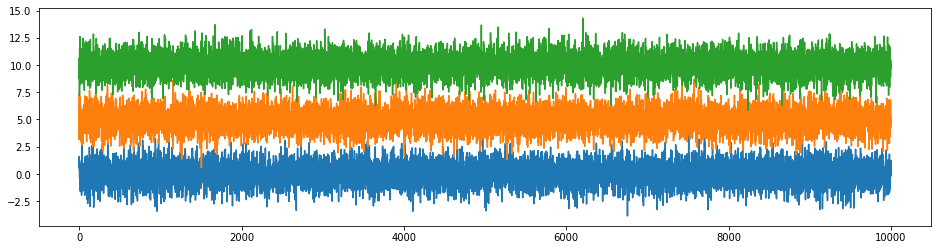

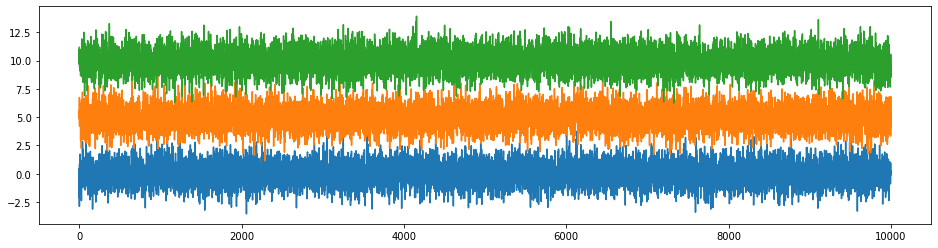

In [33]:
for z_k in Z:
    plt.figure(figsize=(16, 4))
    plt.plot(z_k.T + np.arange(M) * 5)

In [34]:
from scipy.linalg import toeplitz
from itertools import product


In [35]:
def init_W(K, M):
    W = np.zeros((K, M, M))
    W[:, np.arange(M), np.arange(M)] = 1
    W += np.random.rand(*W.shape) / 10
    return W
    

In [36]:
from numpy.linalg import norm

def angle(a, b):
    return a.dot(b) / (norm(a) * norm(b))

def get_random_not_orthogonal(x):
    x = x.flatten()
    tries = 0
    while True:
        r = np.random.rand(len(x)).flatten()
        a = angle(r, x)
        if np.abs(a) <= 1e-4:
            tries += 1
            continue
        if tries >= 10:
            raise Exception("FAIL", x, r, a)
#         if a <= 1e-4:
#             raise Exception("FAIL", x, r, a)
        return r
    
def recursive_h(W, sanity_check=False):
    # Adali 2010
    M, M = W.shape
    Q = list()
    Q_inv = list()
    h = list()
    c = list()
    
    # c_n calculations
    for n in range(M - 1):
        W_n = W[np.arange(M) != n] # Size M - 1

        c_n = np.array(
            [
                (W[n] - W[n + 1]).T @ W[i] if i != n else (norm(W[n]) ** 2 - norm(W[n + 1]) ** 2) / 2
                for i
                in range(M)
                if i != n + 1
            ]
        ).reshape(-1, 1)
#         nn = n + 1
#         c_n_str = [
#             f"(W_{nn} - W_{nn + 1}).T @ W_{i+1}" if i != n else f"(norm(W_{nn}) ** 2 - norm(W_{nn + 1}) ** 2) / 2"
#             for i
#             in range(M)
#             if i != n + 1
#         ]
#         print(f"N={M}, n={nn}, ", c_n.shape)
#         print("\n".join(c_n_str), end="\n\n")
        c.append(c_n)

    # First Q
    W_1 = W[np.arange(M) != 0]
    Q_1 = W_1 @ W_1.T
    Q_inv.append(np.linalg.inv(Q_1))
    # Q_{n+1} calculation
    for n in range(M - 1):
        # Calculate Q_{n+1} from Q_{n}, starting from precalculated Q_1
        e_n = np.zeros((M - 1, 1))
        c_n = c[n]
        # e has the (n-1)th value equal to 1 because we are calculating Q_n instead of Q_{n+1}
        e_n[n] = 1
        Q_n_inv = Q_inv[n]
        Qn_1_inv = Q_n_inv - Q_n_inv @ c_n @ e_n.T @ Q_n_inv / ( 1 + e_n.T @ Q_n_inv @ c_n)
        Qn_1_inv = Qn_1_inv - Qn_1_inv @ e_n @ c_n.T @ Qn_1_inv / ( 1 + c_n.T @ Qn_1_inv @ e_n)
        # Append Q_n+1 to Q, until M - 1 (n + 1= M)
        Q_inv.append(Qn_1_inv)

    
    for n in range(M):
        W_n = W[np.arange(M) != n]
        r = get_random_not_orthogonal(W[n]).reshape(-1, 1)
        P_n = np.eye(M) - W_n.T @ Q_inv[n] @ W_n
        
        h_n = P_n @ r
        h_n /= norm(h_n, 2)
        if sanity_check:
            sanity = W[np.arange(M) != n] @ h_n
            assert np.allclose(sanity, 0, 1e-5), f"For h_{n}: " + str(sanity)
        h.append(h_n)
            
    return np.stack(h)

W = np.random.rand(K, M, M)

H = np.stack([recursive_h(W[k]) for k in range(K)])

In [37]:
# All must be zero

for k in range(K):
    for m in range(M):
#         print(
# #             f"k={k},m={m}", angle(H[k, m].flatten(), W[k, np.arange(M) != m])
#             f"k={k},m={m}\n", W[k, np.arange(M) != m] @ H[k, m]
#         )
        assert np.allclose(W[k, np.arange(M) != m] @ H[k, m], 0, atol=1e-8)
    

In [3]:
def ISI(W, A):
    # https://github.com/trendscenter/gift/blob/ca71b3ab852423f1c2dc118017917a231265fc84/GroupICATv4.0c/icatb/icatb_analysis_functions/icatb_algorithms/icatb_iva_laplace.m
    assert W.shape == A.shape
    K, M, _ = W.shape
    G = np.stack([W[k] @ A[k] for k in range(K)])
    G = np.abs(G).sum(axis=0)
    isi = 1 / (2 * M * (M - 1))
    score = - 2 * M
    score += (G / G.max(axis=1, keepdims=True)).sum()
    score += (G / G.max(axis=0, keepdims=True)).sum()

    return isi * score

    
a = """
0.948709   0.926739   0.130089   0.770445
0.930650   0.399674   0.200565   0.144566
0.078480   0.045465   0.942084   0.608882
0.954525   0.377033   0.036410   0.163378
"""
b = """
0.075914   0.622760   0.640964   0.035257
0.294842   0.159619   0.083161   0.614882
0.013225   0.363917   0.856707   0.198607
0.848886   0.556646   0.397540   0.246305
"""
def str_parse(x):
    return np.array([list(map(float, a.split("   "))) for a in x.split("\n") if a])
isi = ISI(
    str_parse(a).reshape(1, 4, 4),
    str_parse(b).reshape(1, 4, 4)
)
np.isclose(isi, 0.59194, 1e-5), isi

(True, 0.5919361163708312)

In [39]:
def ISR(W, A):
    assert W.shape == A.shape
    K, M, _ = W.shape
    G = np.stack([w @ a for w, a in zip(W, A)])
    G = np.stack([g - np.diag(g.diagonal()) for g in G])
    
    score = np.power(G, 2).sum() / (K * M * (M - 1))
    return score

ISR(np.stack([np.linalg.inv(a) for a in A]), A), ISR(np.random.rand(K, M, M), A)

(4.371386091127675e-30, 0.7969533261383209)

5.921189464667501e-16

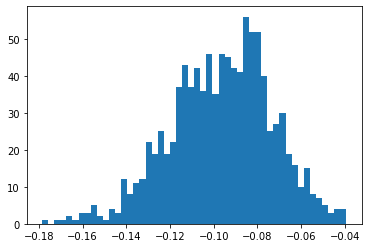

In [40]:
plt.hist(
    [
        np.log10(
            ISI(
                np.random.rand(K, M, M),
                A,
            )
        )
        for _ in range(1000)
    ],
    bins=50
)
ISI(W_opt, A)

(4.371386091127675e-30, 0.9914837136632241, 0.9611694368120623)

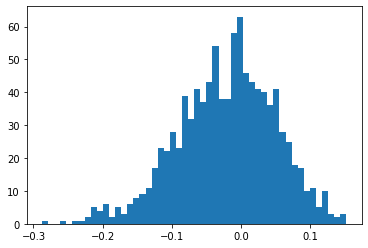

In [41]:
plt.hist(
    [
        np.log10(
            ISR(
                np.random.rand(K, M, M),
                A,
            )
        )
        for _ in range(1000)
    ],
    bins=50
)
(
    ISR(W_opt, A),
    ISR(np.stack([np.eye(M) for k in range(K)]), A),
    ISR(np.random.rand(K, M, M), A)
)

In [42]:
def phi_n(y_n):
    M, N = y_n.shape
    value = np.linalg.inv(y_n @ y_n.T / N) @ y_n
    return value.mean(axis=1)

def phi(y):
    K, M, N = y.shape
    return np.stack([phi_n(y[:, m]) for m in range(M)])

# plt.imshow(phi(Z)[0])

phi_n(Z[:, 0]).shape, phi(Z).shape

((10,), (3, 10))

In [43]:
ISI(A, W)

0.7657336830834034

In [94]:
from tqdm import tqdm


def IVA_GV(Z, lr=1e-2, epochs=100, A=None):
    K, M, N = Z.shape
    delta_history = np.empty((K, M, epochs))
    ISI_history = np.empty(epochs)
    ISR_history = np.empty(epochs)
    W = np.stack([np.eye(M) for _ in range(K)])

    for i in tqdm(range(epochs)):
        
        Y = np.stack([W[k] @ Z[k] for k in range(K)])
        H = np.stack([recursive_h(W[k], sanity_check=True) for k in range(K)]) # K x M x M x 1

        sigma_inv = np.empty((M, K, K))

        for n in range(M):
            sigma_inv[n] = np.linalg.inv(Y[:, n] @ Y[:, n].T / N)

        for k in range(K):
            e = np.zeros((K, 1))
            e[k] = 1

            for n in range(M):
                delta = (Z[k] @ Y[:, n].T / N) @ sigma_inv[n] @ e
                delta -= H[k, n] / (H[k, n].T @ W[k, n])
                # E[x[k] @ y[n].T] @ sigma_n ^⁻1 @ ek
                delta = delta.flatten()
    #             delta = (Z[k]).mean(axis=1, keepdims=True).T

                w_n_new = W[k, n] - lr * delta
                w_n_new = w_n_new / norm(w_n_new, 2)
                delta_history[k, n, i] = norm(W[k, n] - w_n_new)
                W[k, n] = w_n_new
                
                
        if A is not None:
            ISI_history[i] = ISI(W, A)
            ISR_history[i] = ISR(W, A)

        
    return W, delta_history, ISI_history, ISR_history
IVA_GV(X, epochs=1);

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 32.08it/s]


In [92]:
W = np.stack([np.eye(M) for _ in range(K)])
H = np.stack([recursive_h(W[k]) for k in range(K)]) # K x M x M x 1
H[0, 0].shape

(3, 1)

100%|███████████████████████████████████████| 2000/2000 [01:31<00:00, 21.97it/s]


Text(0.5, 1.0, 'ISR')

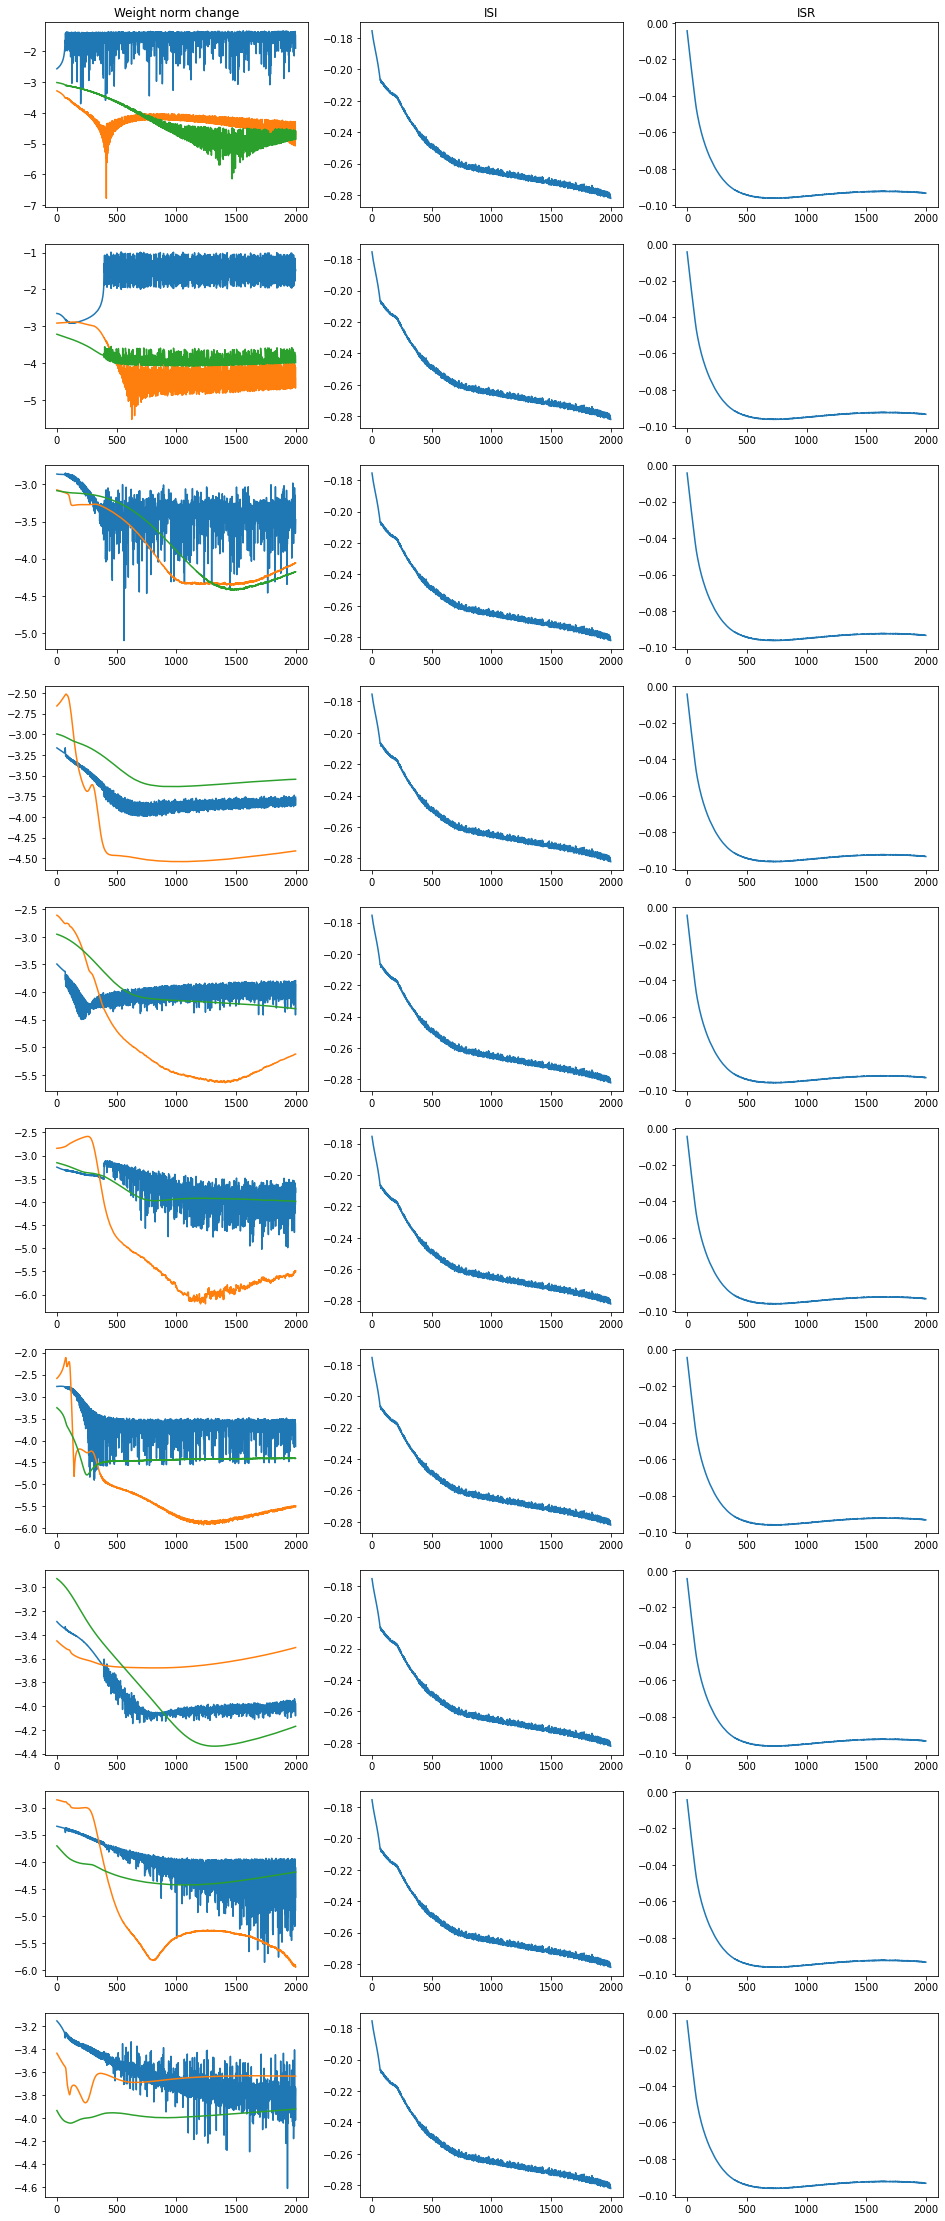

In [104]:

W, delta_history, ISI_history, ISR_history = IVA_GV(X, A=A, epochs=2000, lr=1e-3)

fig, axes = plt.subplots(K, 3, figsize=(16, 4 * K))

for k in range(K):
    axes[k, 0].plot(np.log10(delta_history[k]).T)
    axes[k, 1].plot(np.log10(ISI_history))
    axes[k, 2].plot(np.log10(ISR_history))

axes[0, 0].set_title("Weight norm change")
axes[0, 1].set_title("ISI")
axes[0, 2].set_title("ISR")


[[-0.08312534  0.10043268 -0.07895425]
 [ 2.48840178 -0.28171719  0.09606863]
 [-0.16237262 -1.05149709  0.33170176]]


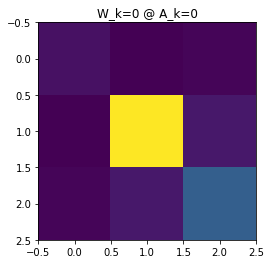

[[-0.21505703  0.20390748 -0.18537434]
 [ 0.36669579 -0.46411768 -0.30544315]
 [ 0.37079932 -0.32533976  0.71533305]]


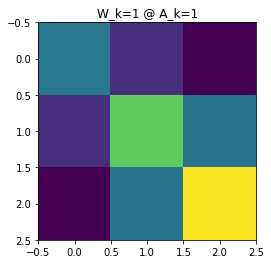

[[ 2.25215186e-01 -1.67650870e-01  1.05979600e-03]
 [-6.21701262e-01 -7.58616044e-01  1.30441481e-02]
 [-6.52135223e-02  4.89149787e-03  1.77919404e+00]]


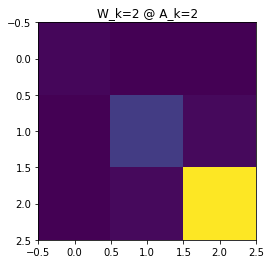

[[-1.24026552  0.99434949  1.38023662]
 [-0.4748267  -0.12170796 -0.07257682]
 [-0.05866421  0.67939526 -0.56513071]]


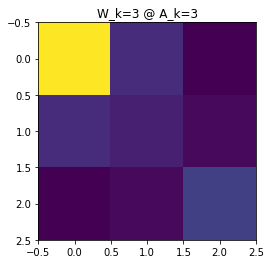

[[ 0.71485044 -1.60323437  1.38443929]
 [ 0.39473675  0.03381619 -0.03609239]
 [ 0.04603783 -0.80166527 -0.6173165 ]]


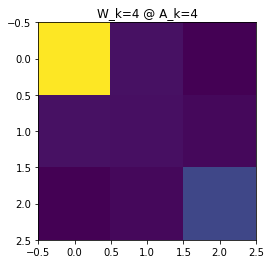

[[-0.24461799  0.87455985 -0.20309289]
 [ 0.57150516  0.02550693  0.04826303]
 [-0.37804567  0.01345556  1.54761867]]


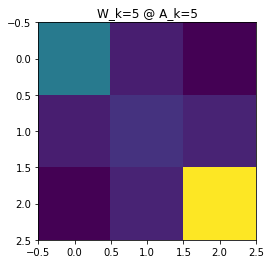

[[ 0.65171514 -0.62249588 -0.46242337]
 [ 0.25496433  0.24060624 -0.04113418]
 [-1.77072164 -1.98900544  1.25789785]]


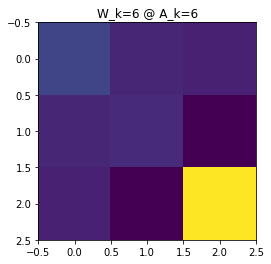

[[-0.36652885 -1.17847195  0.38916013]
 [-0.6552207   0.16279369 -0.10048186]
 [ 0.06947517 -0.53971041 -0.87230766]]


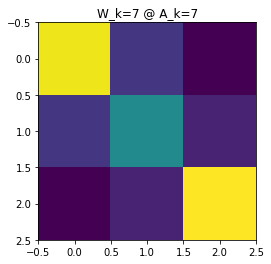

[[-0.04840477 -0.34446396 -0.50791241]
 [ 0.52679949 -0.05779795  0.00203776]
 [ 0.06551911  1.33965122 -0.2908199 ]]


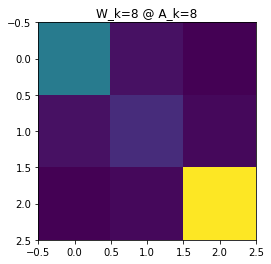

[[ 0.04381343 -0.69063115  0.82712282]
 [-2.5386798  -0.03024187  0.19962851]
 [-0.78455134 -2.34262946 -0.9550885 ]]


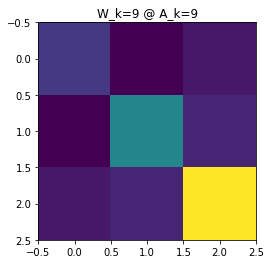

In [96]:
# W = IVA_GN(X, A=A, epochs=100, lr=1e-2)

for k in range(K):
    a = W[k] @ X[k]
    print(W[k] @ A[k])
    plt.title("W_k={} @ A_k={}".format(k, k))
    plt.imshow(a @ a.T / N)
    plt.show()

In [57]:
fo

array([[10.85525253,  1.65121281,  5.28008747],
       [ 1.65121281, 26.43202942,  6.68877414],
       [ 5.28008747,  6.68877414, 54.27804048]])

In [52]:
np.log10(ISI(W, A)), np.log10(ISR(W, A))

(-0.32445132158836615, -0.12327371805400958)

100%|█████████████████████████████████████████| 300/300 [00:30<00:00,  9.81it/s]


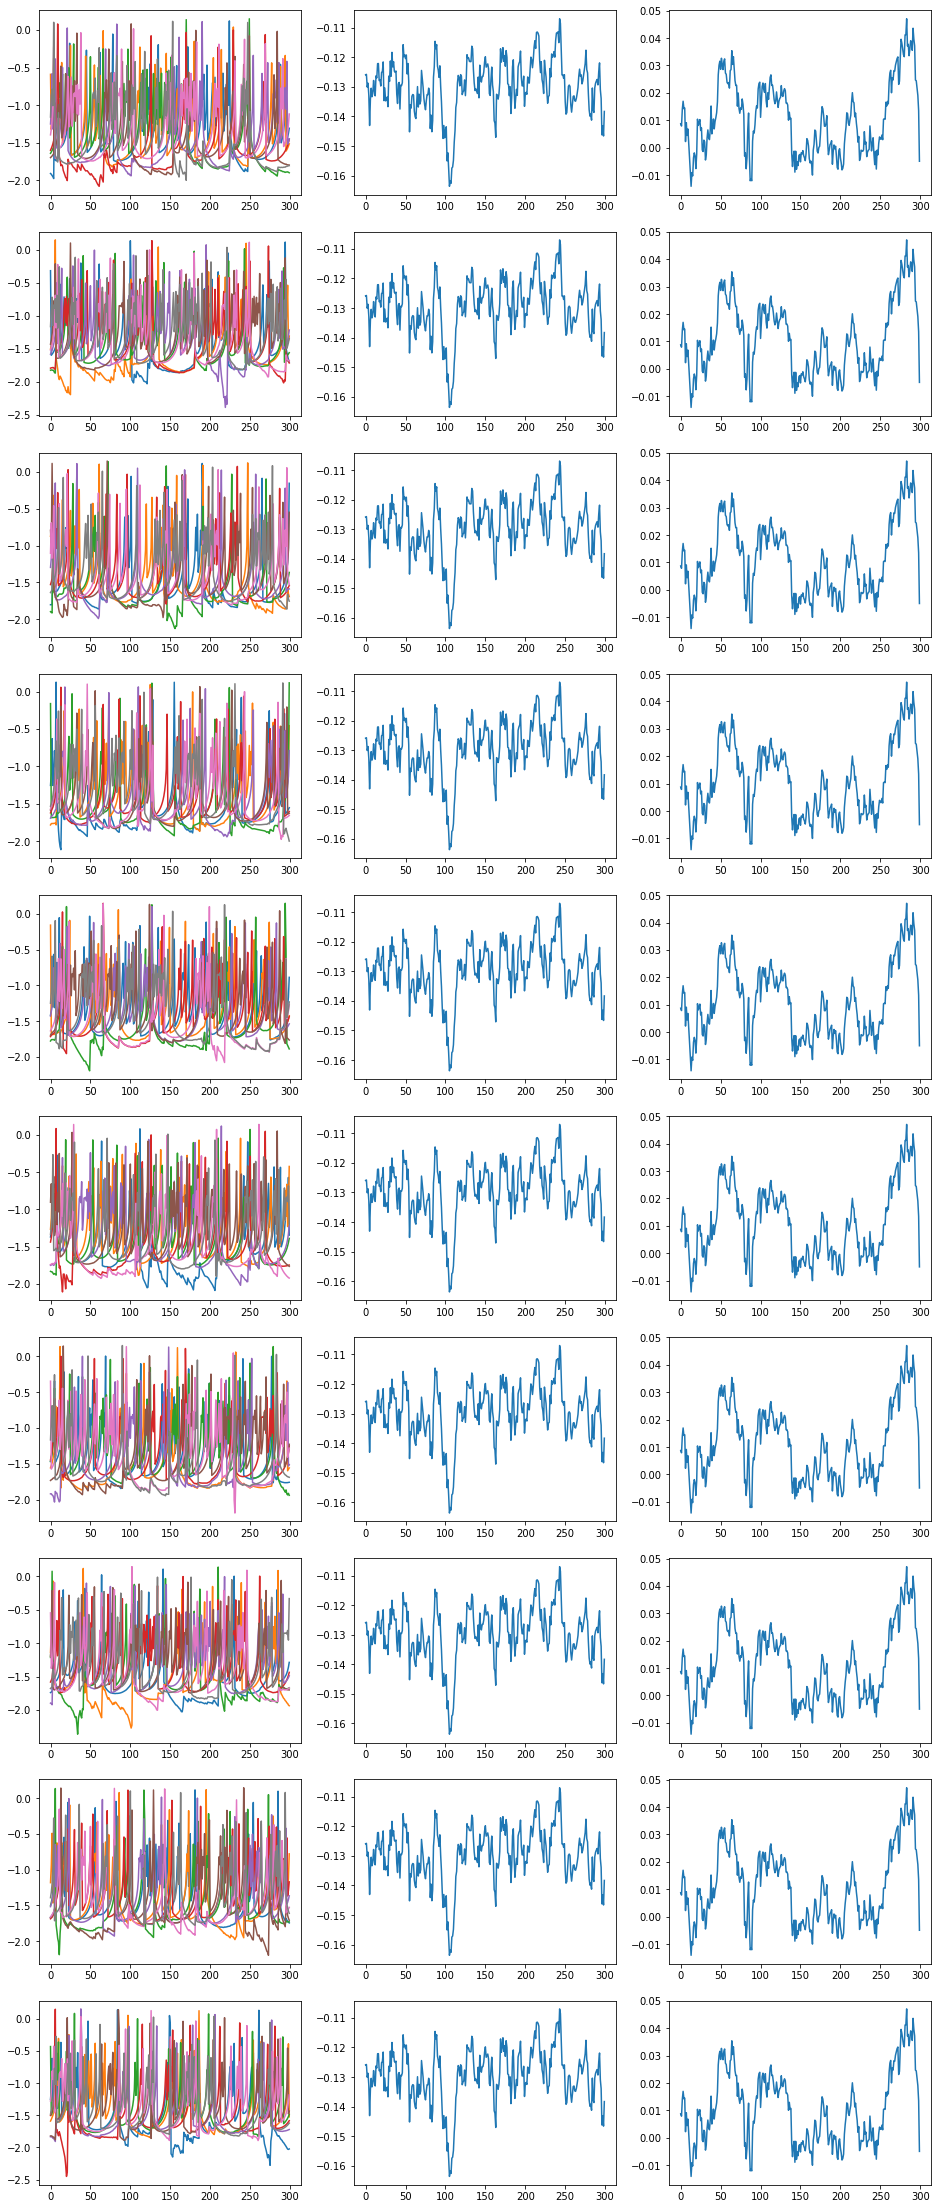

In [43]:
# seed = 1
# np.random.seed(seed)
# SCVs = list()

# x = np.linspace(0, 2 * np.pi * 100, N)

# for m in range(M):
#     SCV = np.stack(
#         [
#             np.sin(x * (i + 1)/ (K + 1))
#             for i in range(K)
#         ]
#     )
#     SCVs.append(SCV)
# SCVs = np.stack(SCVs)
# A = np.random.normal(0, 1, size=(K, M, M))
# W_opt = np.stack([np.linalg.inv(w) for w in W])
# S = SCVs.transpose(1, 0, 2)
# X = np.stack([w @ x for w, x in zip(W, S)])
# W, delta_history, ISI_history, ISR_history = IVA_GV(X, A=A, epochs=300, lr=1e-2)

# fig, axes = plt.subplots(K, 3, figsize=(16, 4 * K))

# for k in range(K):
#     axes[k, 0].plot(np.log10(delta_history[k]).T)
#     axes[k, 1].plot(np.log10(ISI_history))
#     axes[k, 2].plot(np.log10(ISR_history))

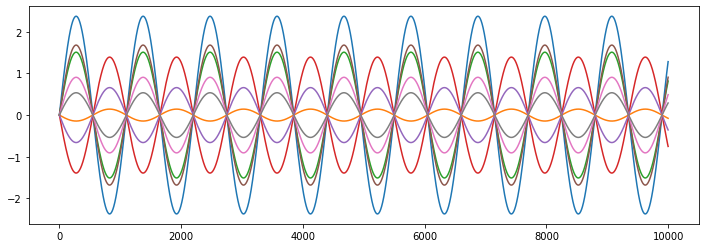

In [45]:
plt.figure(figsize=(12, 4))
plt.plot(X[0].T)

In [127]:
seed = 1
np.random.seed(seed)
SCVs = list()
for m in range(M):
    cov = np.random.normal(size=(K, K))
    cov = cov @ cov.T
    SCV = np.random.multivariate_normal(np.zeros(K), cov, size=(N)).T
    SCVs.append(SCV)
SCVs = np.stack(SCVs)
W = np.random.normal(0, 1, size=(K, M, M))
W_opt = np.stack([np.linalg.inv(w) for w in W])
S = SCVs.transpose(1, 0, 2)
X = np.stack([w @ x for w, x in zip(W, X)])
# Sources = np.stack([whitening_multivar_signal(Source) for Source in Sources])
# True_Weights = np.random.normal(0, 1, size=(K, M, M))
# Obs = np.stack([True_Weights[k] @ Sources[k] for k in range(K)])
X.shape

(10, 8, 10000)

(<matplotlib.image.AxesImage at 0x7eff182089a0>, (10, 10), 10, 8)

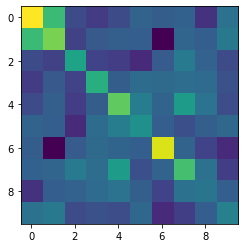

In [132]:
plt.imshow(S[:, 0] @ S[:, 0].T), (S[:, 0] @ S[:, 0].T).shape, K, M

(<matplotlib.image.AxesImage at 0x7eff182e7ca0>, (8, 8), 10, 8)

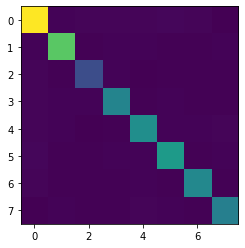

In [136]:
plt.imshow(S[0] @ S[0].T), (S[0] @ S[0].T).shape, K, M

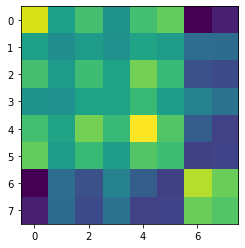

In [137]:
plt.imshow(X[0] @ X[0].T)

(<matplotlib.image.AxesImage at 0x7eff182a6ca0>, (10, 10), 10, 8)

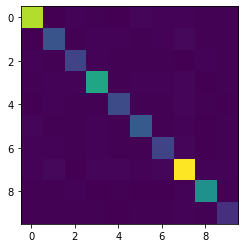

In [135]:
plt.imshow(X[:, 0] @ X[:, 0].T), (X[:, 0] @ X[:, 0].T).shape, K, M

(<matplotlib.image.AxesImage at 0x7eff1892fb20>, (10, 10), 10, 8)

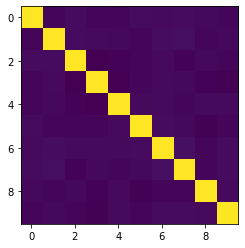

In [129]:
Z = np.stack([whitening_multivar_matrix(x) @ x for x in X])
plt.imshow(Z[:, 0] @ Z[:, 0].T), (Z[:, 0] @ Z[:, 0].T).shape, K, M

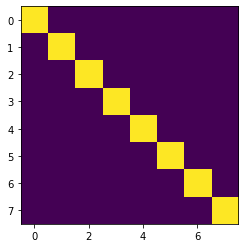

In [81]:
plt.imshow(np.cov(whitening_multivar_matrix(X[0]) @ X[0]))

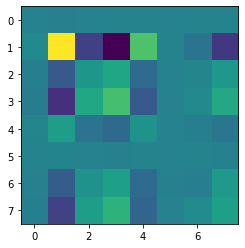

In [131]:
plt.imshow(whitening_multivar_matrix(X[1]) @ W[1])

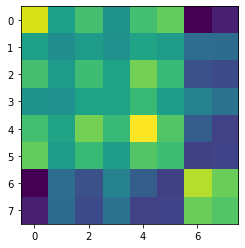

In [89]:
plt.imshow(np.cov(W_opt[0] @ X[0]))

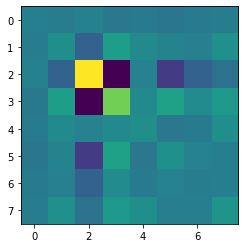

In [90]:
plt.imshow(np.cov(W_opt[1] @ X[1]))

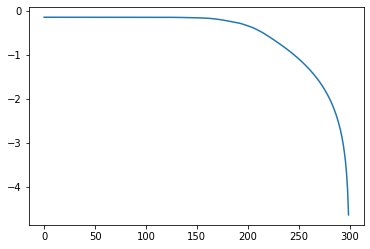

In [78]:

hist = list()
n = 300
for i in range(300):
    hist.append(
        ISI(W * ((n - i) / n) ** 2 + W_opt * (i / n) ** 2, A)
    )
plt.plot(np.log10(hist))

In [ ]:
K = 10
M = 3
N = 1000
cov = np.random.normal(size=(M, M))
cov = cov @ cov.T
Sources = np.random.multivariate_normal(np.zeros(M), cov, size=(K, N)).transpose(0, 2, 1)
Sources = np.stack([whitening(Source) for Source in Sources])
True_Weights = np.random.rand(K, M, M)
Obs = np.stack([True_Weights[k] @ Sources[k] for k in range(K)])

W, delta_history, ISI_history, ISR_history = IVA_GV(Obs, A=True_Weights, epochs=100, lr=1e-2)

fig, axes = plt.subplots(K, 3, figsize=(16, 4 * K))

for k in range(K):
    axes[k, 0].plot(np.log10(delta_history[k]).T)
    axes[k, 1].plot(np.log10(ISI_history))
    axes[k, 2].plot(np.log10(ISR_history))


In [ ]:
from tqdm import tqdm

def get_R(z):
    K, M, N = z.shape
    R = np.empty((K, K, M, M))
    # for every SCV [s_m^1, ..., s_m^K] 
    for k1, k2 in product(range(K), range(K)):
        R[k1, k2] = z[k1] @ z[k2].T / N
    return R


# W = init_W(K, M)

Z = X
cov = np.random.normal(size=(M, M))
cov = cov @ cov.T
S_ = np.random.multivariate_normal(np.zeros(M), cov, size=(K, 1000)).transpose(0, 2, 1)

# W = np.stack([np.eye(M) + np.random.rand(M, M)/10 for k in range(K)])
W = np.stack([np.eye(M) for k in range(K)])
W = np.random.rand(K, M, M)

Z = np.stack([W[k] @ S_[k] for k in range(K)])

epochs = 400
lr = 1e-2
delta_history = np.empty((K, M, epochs))
ISI_history = np.empty(epochs)
ISR_history = np.empty(epochs)

R = get_R(Z) # K x K
sigma_0 = np.stack([Z[:, n] for n in range(M)])

for i in tqdm(range(epochs)):

    Y = np.stack([W[k] @ Z[k] for k in range(K)])
    H = np.stack([recursive_h(W[k]) for k in range(K)]) # K x M x M x 1
        
    sigma_inv = np.empty((M, K, K))
    
    for n in range(M):
        sigma_inv[n] = np.linalg.inv(Y[:, n] @ Y[:, n].T / N)

    for k in range(K):
        e = np.zeros((K, 1))
        e[k] = 1
    
        for n in range(M):
            delta = Z[k] @ Y[:, n].T @ sigma_inv[n] @ e / N
            delta -= H[k, n] / (H[k, n].T @ W[k, n])
            # E[x[k] @ y[n].T] @ sigma_n ^⁻1 @ ek
            delta = delta.flatten()
#             delta = (Z[k]).mean(axis=1, keepdims=True).T

            w_n_new = W[k, n] - lr * delta
            w_n_new = w_n_new / norm(w_n_new, 2)
            delta_history[k, n, i] = norm(W[k, n] - w_n_new)
            W[k, n] = w_n_new
            
    ISI_history[i] = (ISI(W, A))
    ISR_history[i] = ISR(
        reorder(W, A, ISR),
        A
    )
# 

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(ISI_history)
plt.show()

In [ ]:
for k in range(K):
    plt.figure(figsize=(12, 4))
    plt.plot(np.log10(delta_history[k]).T)
    plt.show()

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(ISR_history)
plt.show()

In [ ]:
for k in range(K):
    plt.figure(figsize=(4, 4))
    plt.imshow(W[k])
               
               

In [ ]:
for k in range(K):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
#     axes[0].plot((Z[k]).T+ 20*np.arange(M).reshape(1, -1))
#     axes[1].plot((W[k] @ Z[k]).T+ 20*np.arange(M).reshape(1, -1))
    axes[0].plot((Z[k]).T+ np.arange(M).reshape(1, -1))
    axes[1].plot((W[k] @ Z[k]).T+ np.arange(M).reshape(1, -1))
    plt.tight_layout()
    axes[0].set_title("Original")
    axes[1].set_title("Filtered")
    
    plt.show()

In [ ]:
from sklearn.decomposition import FastICA

fica = FastICA(n_components=M)
for k in range(K):
    y = fica.fit_transform(X[k].T)
    plt.figure(figsize=(12, 5))
    plt.plot(y + .25 * np.array([1, 2, 3, 4, 5]).reshape(1, -1))

In [ ]:
from pyiva.iva_laplace import iva_laplace
W = iva_laplace(Z)

In [ ]:
for k in range(K):
    plt.figure(figsize=(12, 4))
    plt.plot((W[k] @ S[k]).T+ 20 * np.arange(M).reshape(1, -1))
    plt.show()

In [ ]:
plt.imshow(W[0])